In [245]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

os.chdir("/Users/jacobrichards/Desktop/DS_DA_Projects/90+_DaysPastDue/90+DPD_files")

train = pd.read_csv("FITB_train.csv", na_values=["", "NA"])

test = pd.read_csv("FITB_test.csv", na_values=["", "NA"])

In [246]:
display(train.head())

,feature_1,feature_2,feature_3,feature_4,id,date,y
0,39.165085,60.253765,137.986051,-35.462685,50501,2000-12-31,active
1,-12.614289,57.959237,126.212293,44.420647,50501,2001-12-31,90+DPD
2,0.043813,-39.293907,138.687175,64.944112,50501,2002-12-31,active
3,2.296984,49.996686,123.782456,-3.587873,50501,2003-12-31,active
4,7.188897,-83.533230,150.102046,95.359641,50501,2004-12-31,active


fill in NA's of feature 3 

In [247]:
na_indices_train = train[train['feature_3'].isna()].index
median_value = train['feature_3'].median()
train['feature_3'].fillna(median_value, inplace=True)
train.rename(columns={'feature_3': 'feature_3_impute'}, inplace=True)

na_indices_test = test[test['feature_3'].isna()].index
median_value = test['feature_3'].median()
test['feature_3'].fillna(median_value, inplace=True)
test.rename(columns={'feature_3': 'feature_3_impute'}, inplace=True)

/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_26293/4155419008.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['feature_3'].fillna(median_value, inplace=True)
/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_26293/4155419008.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

fill in the NA's of feature 2

In [248]:
train['date'] = pd.to_datetime(train['date']).dt.year
test['date'] = pd.to_datetime(test['date']).dt.year

def impute_feature_2(df):
    df = df.sort_values(by=['id', 'date'])  
    df['feature_2'] = df['feature_2'].fillna(method='bfill') 
    df['feature_2'] = df['feature_2'].fillna(method='ffill') 
    return df

train = train.groupby('id', group_keys=False).apply(impute_feature_2)
test = test.groupby('id', group_keys=False).apply(impute_feature_2)

train.rename(columns={'feature_2': 'feature_2_impute'}, inplace=True)
test.rename(columns={'feature_2': 'feature_2_impute'}, inplace=True)

train = train.dropna(subset=['feature_2_impute'])
test = test.dropna(subset=['feature_2_impute'])

/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_26293/960713373.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['feature_2'] = df['feature_2'].fillna(method='bfill')
/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_26293/960713373.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['feature_2'] = df['feature_2'].fillna(method='ffill')
/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_26293/960713373.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train = train.groupby('id', gro

encode outocomes to 1 and 0 

In [249]:
train['y'] = train['y'].apply(lambda x: 1 if x == "90+DPD" else 0 if x == "active" else x)
test['y'] = test['y'].apply(lambda x: 1 if x == "90+DPD" else 0 if x == "active" else x)

In [250]:
display(train.head())

,feature_1,feature_2_impute,feature_3_impute,feature_4,id,date,y
0,39.165085,60.253765,137.986051,-35.462685,50501,2000,0
1,-12.614289,57.959237,126.212293,44.420647,50501,2001,1
2,0.043813,-39.293907,138.687175,64.944112,50501,2002,0
3,2.296984,49.996686,123.782456,-3.587873,50501,2003,0
4,7.188897,-83.533230,150.102046,95.359641,50501,2004,0


Now that all the NA's are gone, 

Preliminary diagnostics for suitability of Logistic Regression. 

In [251]:
import statsmodels.api as sm

predictor = train[['feature_1', 'feature_2_impute', 'feature_3_impute', 'feature_4']]
response = train['y']

predictor_with_const = sm.add_constant(predictor)

logit_model = sm.Logit(response, predictor_with_const)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.391515
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3941
Model:                          Logit   Df Residuals:                     3936
Method:                           MLE   Df Model:                            4
Date:                Thu, 19 Dec 2024   Pseudo R-squ.:                  0.2266
Time:                        07:29:09   Log-Likelihood:                -1543.0
converged:                       True   LL-Null:                       -1995.2
Covariance Type:            nonrobust   LLR p-value:                1.867e-194
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.5239      0.327     13.827      0.000       3.883       5.165
feature_1 

The Pseduo R-square is 0.2260, which begs the question of are these variables actually predictors of the response in a manner which a logistic regression model is suited for.

Here are the log(p/1-p) (logit) curves for each predictor from the model. 

Optimization terminated successfully.
         Current function value: 0.391515
         Iterations 10


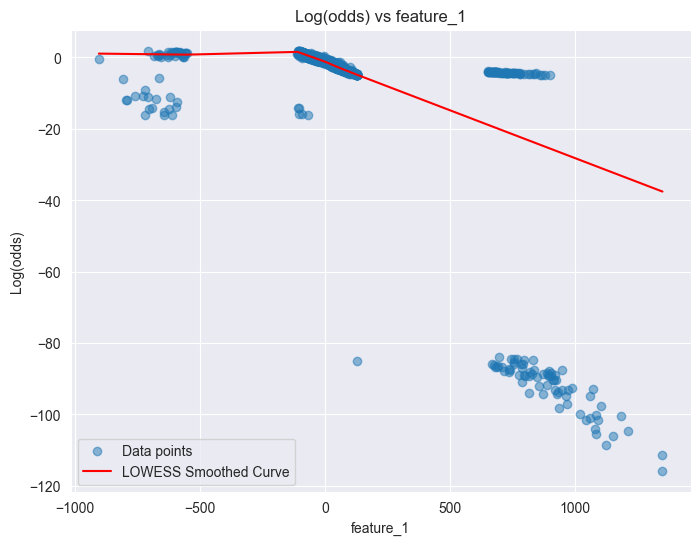

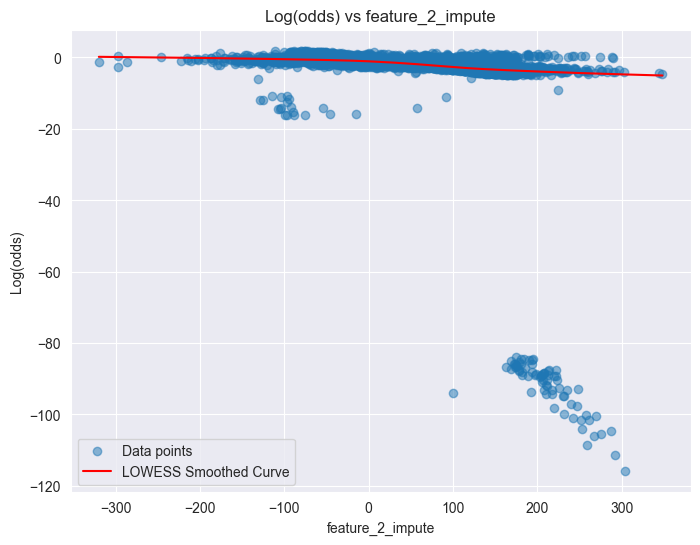

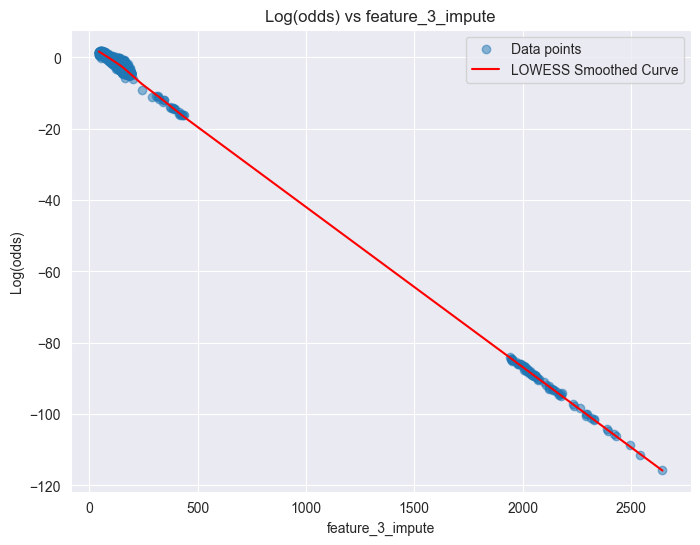

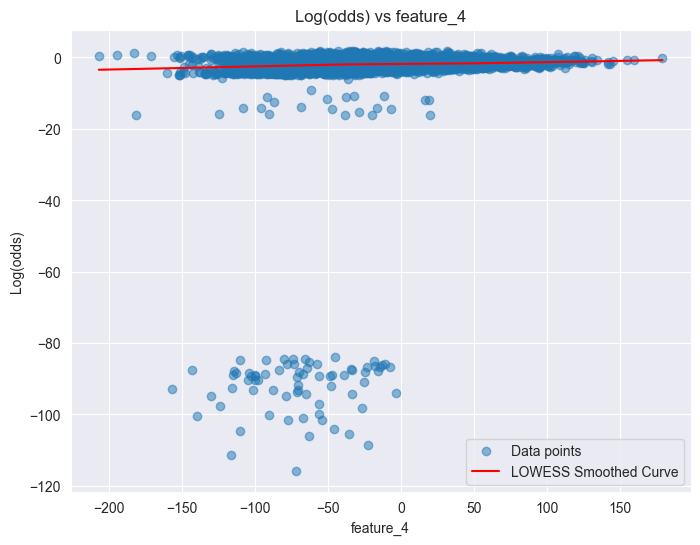

In [252]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Extract predictors and response
predictor = train[['feature_1', 'feature_2_impute', 'feature_3_impute', 'feature_4']]
response = train['y']

# Add constant for the intercept
predictor_with_const = sm.add_constant(predictor)

# Fit the logistic regression model
logit_model = sm.Logit(response, predictor_with_const)
result = logit_model.fit()

# Calculate predicted probabilities
predicted_probs = result.predict(predictor_with_const)

# Calculate log(odds)
log_odds = np.log( predicted_probs / (1 - predicted_probs) )

# Plot the log(odds) curve for each predictor
for col in predictor.columns:
    plt.figure(figsize=(8, 6))
    
    # Scatter plot
    plt.scatter(predictor[col], log_odds, alpha=0.5, label='Data points')
    
    # Add LOWESS smoothed curve
    lowess = sm.nonparametric.lowess(log_odds, predictor[col])
    plt.plot(lowess[:, 0], lowess[:, 1], color='red', label='LOWESS Smoothed Curve')
    
    # Labels and title
    plt.title(f'Log(odds) vs {col}')
    plt.xlabel(col)
    plt.ylabel('Log(odds)')
    plt.legend()
    plt.show()

We need to verify that the predictor response relationship demonstraighted in the models logit curves are actually representative of the relationship of the variables within the data. That is to say, the model shows predictive power, but is that actually the case.

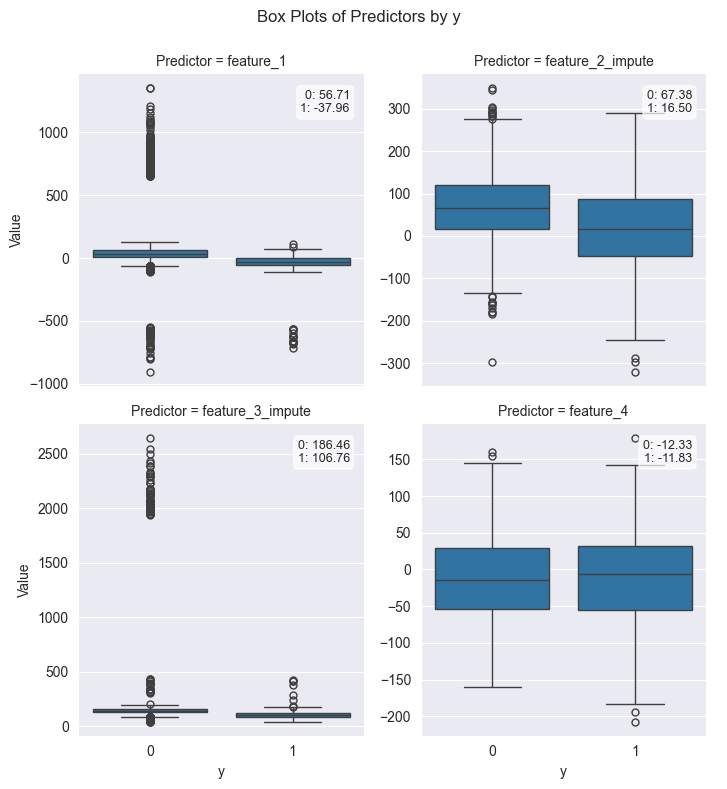

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_combined_box_plots_2x2(df, predictor_vars, categorical_var='target'):
    """
    Create a 2x2 grid of box plots for each predictor variable, grouped by the categorical outcome,
    and include mean annotations for each group within each plot.
    
    Parameters:
    - df: pandas DataFrame containing the data.
    - predictor_vars: List of predictor variables for which box plots will be created.
    - categorical_var: The categorical outcome variable to group by.
    """
    # Melt the dataframe for easier faceted plotting
    melted_df = df[predictor_vars + [categorical_var]].melt(
        id_vars=categorical_var,
        var_name="Predictor",
        value_name="Value"
    )
    
    # Create a facet grid with box plots
    g = sns.catplot(
        data=melted_df,
        x=categorical_var,
        y="Value",
        col="Predictor",
        kind="box",
        height=4,
        aspect=0.9,
        col_wrap=2,  # Ensures a 2x2 grid
        sharey=False,
    )
    
    # Annotate each plot with means
    for ax, predictor in zip(g.axes.flat, predictor_vars):
        category_means = df.groupby(categorical_var)[predictor].mean()
        mean_text = "\n".join([f"{cat}: {mean:.2f}" for cat, mean in category_means.items()])
        ax.text(
            0.95, 0.95,
            mean_text,
            transform=ax.transAxes,
            fontsize=9,
            verticalalignment="top",
            horizontalalignment="right",
            bbox=dict(boxstyle="round", facecolor="white", alpha=0.7)
        )
    
    # Set titles and adjust layout
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Box Plots of Predictors by {categorical_var}')
    plt.show()


predictor_vars = ['feature_1', 'feature_2_impute', 'feature_3_impute', 'feature_4']
# Example usage
plot_combined_box_plots_2x2(train, predictor_vars, categorical_var='y')

The legend has the mean of the variable corespondsing to negative and posative outcomes. This is also inconculsisve.

/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_26293/2840654528.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['binned', categorical_var]).size().reset_index(name='count')


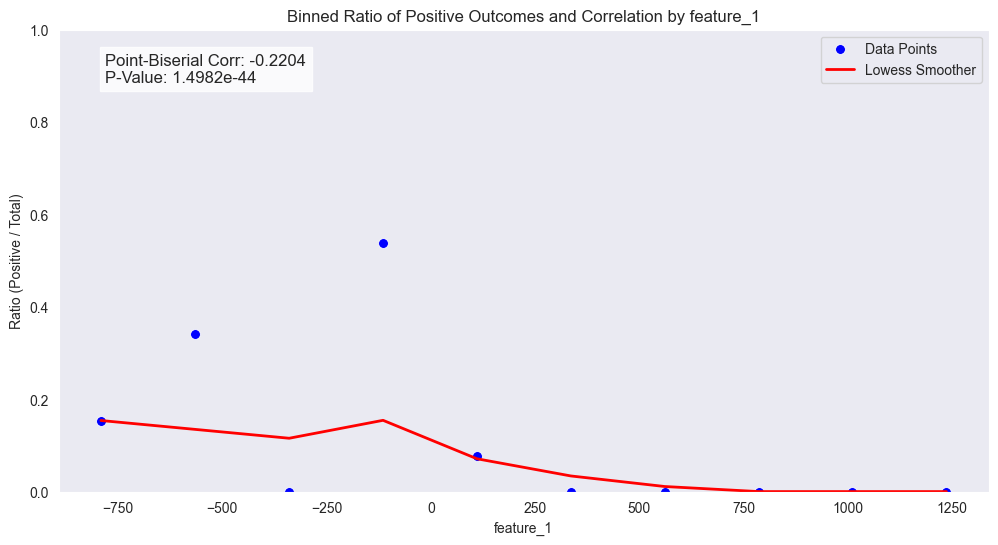

/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_26293/2840654528.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['binned', categorical_var]).size().reset_index(name='count')


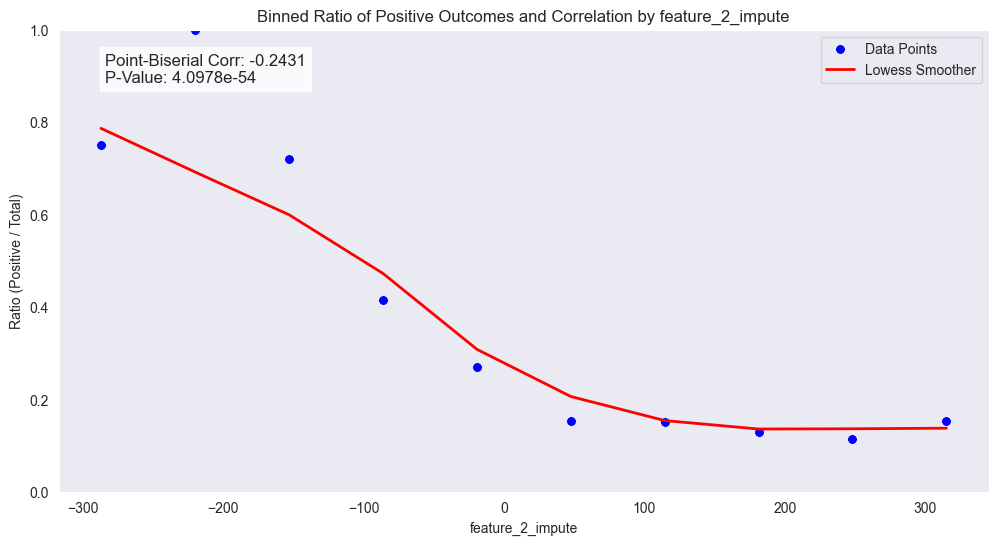

/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_26293/2840654528.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['binned', categorical_var]).size().reset_index(name='count')


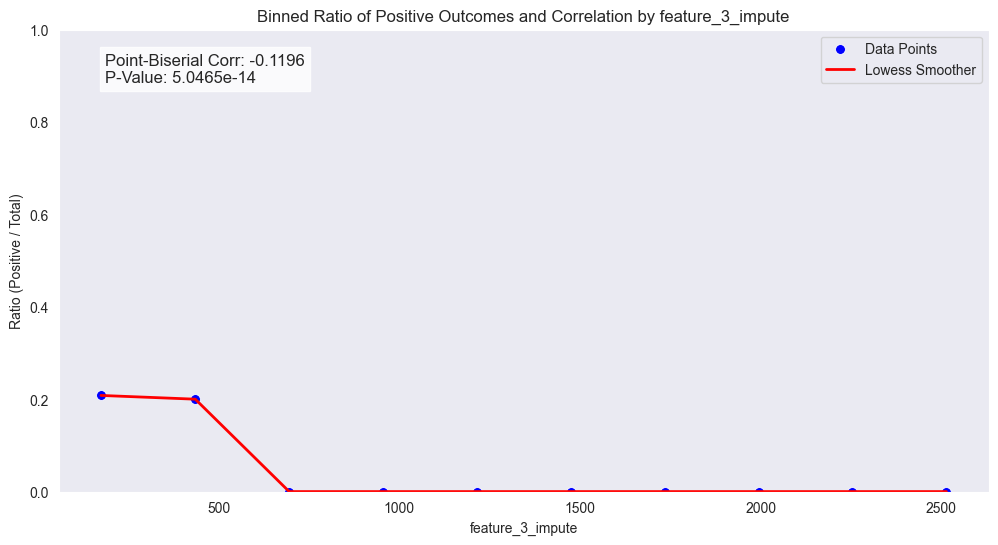

/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_26293/2840654528.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['binned', categorical_var]).size().reset_index(name='count')


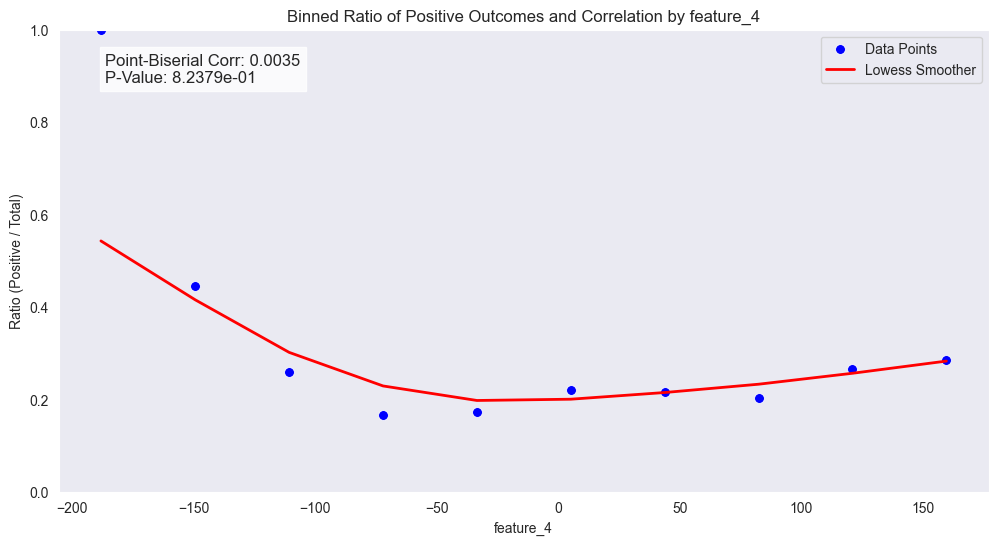

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

def plot_ratio_positive_negative_with_corr_binned(df, continuous_var, categorical_var='target', positive_value=1, negative_value=0, bins=10):
    """
    Plot the ratio of positive to total outcomes for a binned continuous variable with a scatter plot
    and display the correlation coefficient.
    
    Parameters:
    - df: DataFrame containing the data.
    - continuous_var: Name of the continuous predictor column.
    - categorical_var: Name of the binary target column.
    - positive_value: Value representing positive outcomes (default=1).
    - negative_value: Value representing negative outcomes (default=0).
    - bins: Number of bins to divide the continuous variable (default=10).
    """
    # Bin the continuous variable
    df['binned'] = pd.cut(df[continuous_var], bins=bins, include_lowest=True)
    
    # Group by binned variable and category to get counts
    grouped = df.groupby(['binned', categorical_var]).size().reset_index(name='count')
    
    # Pivot so we have positive and negative counts
    pivot = grouped.pivot(index='binned', columns=categorical_var, values='count').fillna(0)
    
    # Extract positive and total counts
    positive_counts = pivot[positive_value] if positive_value in pivot.columns else 0
    total_counts = positive_counts + pivot[negative_value] if negative_value in pivot.columns else positive_counts

    # To avoid division by zero, add a small epsilon
    epsilon = 1e-9
    ratio = positive_counts / (total_counts + epsilon)

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame({
        'binned': ratio.index.astype(str),  # Convert bin intervals to strings for plotting
        'ratio_positive_negative': ratio.values,
        continuous_var: [interval.mid for interval in ratio.index]  # Extract midpoints for x-axis
    })
    
    # Calculate Point-Biserial Correlation (on original data)
    correlation, p_value = pointbiserialr(df[continuous_var], df[categorical_var])
    
    # Plot the points and smoother
    plt.figure(figsize=(12, 6))
    
    # Scatter plot of ratio points
    sns.scatterplot(x=continuous_var, y='ratio_positive_negative', data=plot_df, color='blue', s=50, label='Data Points')

    # Add a smooth trend line (lowess)
    sns.regplot(x=continuous_var, y='ratio_positive_negative', data=plot_df, 
                scatter=False, lowess=True, color='red', line_kws={'lw': 2}, label='Lowess Smoother')

    # Add the correlation coefficient as text on the plot
    plt.text(0.05, 0.95, f'Point-Biserial Corr: {correlation:.4f}\nP-Value: {p_value:.4e}', 
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
    
    # Final plot settings
    plt.title(f'Binned Ratio of Positive Outcomes and Correlation by {continuous_var}')
    plt.xlabel(continuous_var)
    plt.ylabel('Ratio (Positive / Total)')
    plt.ylim(0, 1)  # Ratio ranges between 0 and 1
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
plot_ratio_positive_negative_with_corr_binned(train, 'feature_1', 'y', positive_value=1, negative_value=0, bins=10)
plot_ratio_positive_negative_with_corr_binned(train, 'feature_2_impute', 'y', positive_value=1, negative_value=0, bins=10)
plot_ratio_positive_negative_with_corr_binned(train, 'feature_3_impute', 'y', positive_value=1, negative_value=0, bins=10)
plot_ratio_positive_negative_with_corr_binned(train, 'feature_4', 'y', positive_value=1, negative_value=0, bins=10)

none of these variables demonstriaght linear coorelation, so if these variabels are predictors to the response it must within the relation of the predictors to each other. 

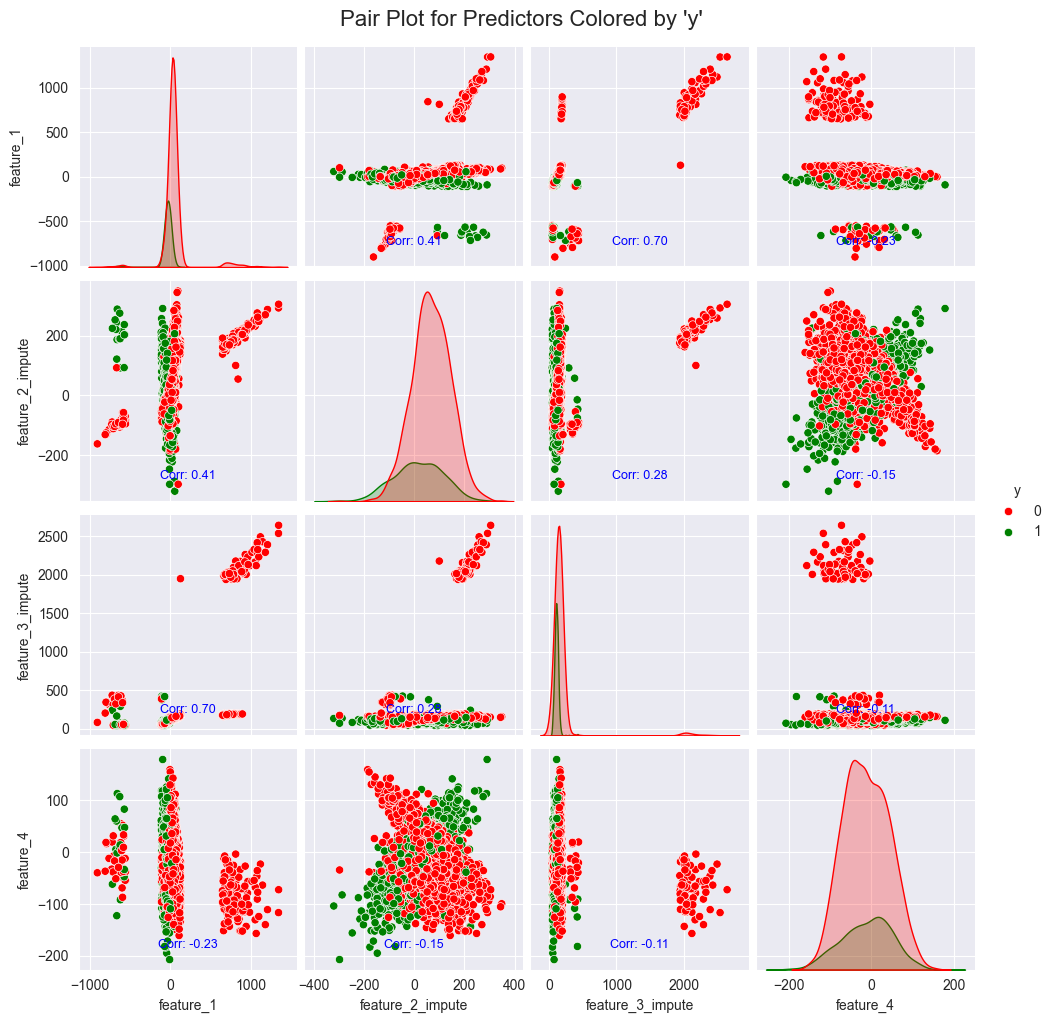

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_full_pairplot_with_corr(df, continuous_vars, target_var='target', positive_value=1, negative_value=0):
    """
    Generate a Seaborn pair plot with correlation coefficients annotated on the scatter plots,
    showing a full matrix.

    Parameters:
    - df: DataFrame containing the data.
    - continuous_vars: List of continuous variable column names.
    - target_var: Name of the binary target column (default='target').
    - positive_value: Value representing positive outcomes (default=1).
    - negative_value: Value representing negative outcomes (default=0).
    """
    # Filter DataFrame for the required columns
    pairplot_data = df[continuous_vars + [target_var]].copy()
    
    # Ensure the target variable is categorical for coloring
    pairplot_data[target_var] = pairplot_data[target_var].astype('category')
    
    # Calculate pairwise correlations
    correlation_matrix = pairplot_data[continuous_vars].corr()
    
    # Create the pair plot
    g = sns.pairplot(
        pairplot_data,
        hue=target_var,
        palette={positive_value: 'green', negative_value: 'red'},
        diag_kind='kde',
        corner=False
    )
    
    # Annotate correlation coefficients
    for i, row_var in enumerate(continuous_vars):
        for j, col_var in enumerate(continuous_vars):
            if i != j:  # Skip diagonal
                # Get the current axis
                ax = g.axes[i, j]
                # Get the correlation value
                corr = correlation_matrix.loc[row_var, col_var]
                # Annotate the correlation on the scatter plot
                ax.annotate(
                    f"Corr: {corr:.2f}",
                    xy=(0.5, 0.1),
                    xycoords="axes fraction",
                    ha="center",
                    fontsize=9,
                    color="blue"
                )
    
    # Add a title for context
    plt.suptitle(f"Pair Plot for Predictors Colored by '{target_var}'", y=1.02, fontsize=16)
    plt.show()

# Continuous variables and target variable
# Call the function for the specific data
continuous_vars_1 = ['age', 'dist', 'income', 'marital_status', 'gender']
target_var = 'target'


# You can call the function again for a different set of variables if needed
continuous_vars_2 = ['feature_1', 'feature_2_impute', 'feature_3_impute', 'feature_4']
response_var_2 = 'y'

plot_full_pairplot_with_corr(train, continuous_vars_2, response_var_2, positive_value=1, negative_value=0)

This is a scatter plot matrix of the predictor variables with the coresponding points labeled in red for those that coresponds with negarive response and green with those that coresponds with posative response. 

This tells us that feature 2 and feature 4 is where we will be getting predictive power in our model and that this data is suitable for logistic regression.

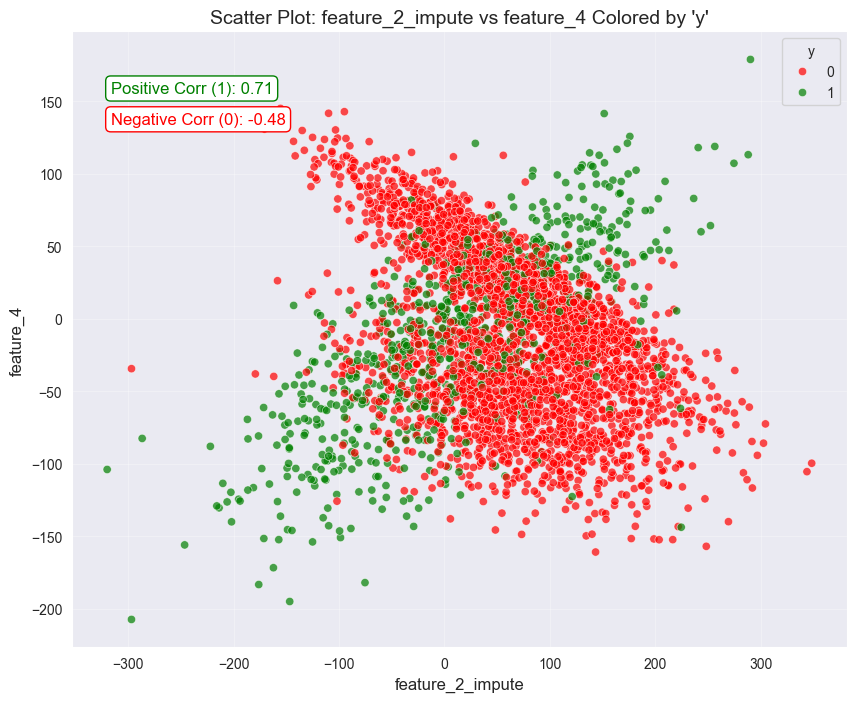

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_single_scatter_with_corr_by_category(df, feature_x, feature_y, target_var='target', positive_value=1, negative_value=0):
    """
    Plot a full-sized scatter plot of two features with correlation annotated for each category.

    Parameters:
    - df: DataFrame containing the data.
    - feature_x: Name of the x-axis feature.
    - feature_y: Name of the y-axis feature.
    - target_var: Name of the binary target column.
    - positive_value: Value representing positive outcomes.
    - negative_value: Value representing negative outcomes.
    """
    # Ensure the target variable is categorical for coloring
    df[target_var] = df[target_var].astype('category')

    # Calculate correlation for each category
    positive_corr = df[df[target_var] == positive_value][feature_x].corr(df[df[target_var] == positive_value][feature_y])
    negative_corr = df[df[target_var] == negative_value][feature_x].corr(df[df[target_var] == negative_value][feature_y])

    # Create the scatter plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        data=df,
        x=feature_x,
        y=feature_y,
        hue=target_var,
        palette={positive_value: 'green', negative_value: 'red'},
        alpha=0.7
    )

    # Annotate correlation for positive and negative categories
    plt.annotate(
        f"Positive Corr ({positive_value}): {positive_corr:.2f}",
        xy=(0.05, 0.9),
        xycoords="axes fraction",
        ha="left",
        fontsize=12,
        color="green",
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="green", facecolor="white")
    )
    plt.annotate(
        f"Negative Corr ({negative_value}): {negative_corr:.2f}",
        xy=(0.05, 0.85),
        xycoords="axes fraction",
        ha="left",
        fontsize=12,
        color="red",
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="white")
    )

    # Set plot labels and title
    plt.title(f"Scatter Plot: {feature_x} vs {feature_y} Colored by '{target_var}'", fontsize=14)
    plt.xlabel(feature_x, fontsize=12)
    plt.ylabel(feature_y, fontsize=12)
    plt.legend(title=target_var, loc='upper right')
    plt.grid(alpha=0.3)
    plt.show()

# Example usage
plot_single_scatter_with_corr_by_category(train, 'feature_2_impute', 'feature_4', target_var='y', positive_value=1, negative_value=0)

that's it we found it. .71 correlation betweeen feature 2 and 4 for their points coresponding to posative outcomes. 

prepare to fit a logistic regression model, check if any outliers are unduly effecting our model's coeficients. 

In [257]:
import statsmodels.api as sm

predictor = train[['feature_1', 'feature_2_impute', 'feature_3_impute', 'feature_4']]
response = train['y']

predictor_with_const = sm.add_constant(predictor)

logit_model = sm.Logit(response, predictor_with_const)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.391515
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3941
Model:                          Logit   Df Residuals:                     3936
Method:                           MLE   Df Model:                            4
Date:                Thu, 19 Dec 2024   Pseudo R-squ.:                  0.2266
Time:                        07:29:14   Log-Likelihood:                -1543.0
converged:                       True   LL-Null:                       -1995.2
Covariance Type:            nonrobust   LLR p-value:                1.867e-194
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.5239      0.327     13.827      0.000       3.883       5.165
feature_1 

let's check the distribution of the variables again but this time for outliers that could be unduly effecting our model coeficients 

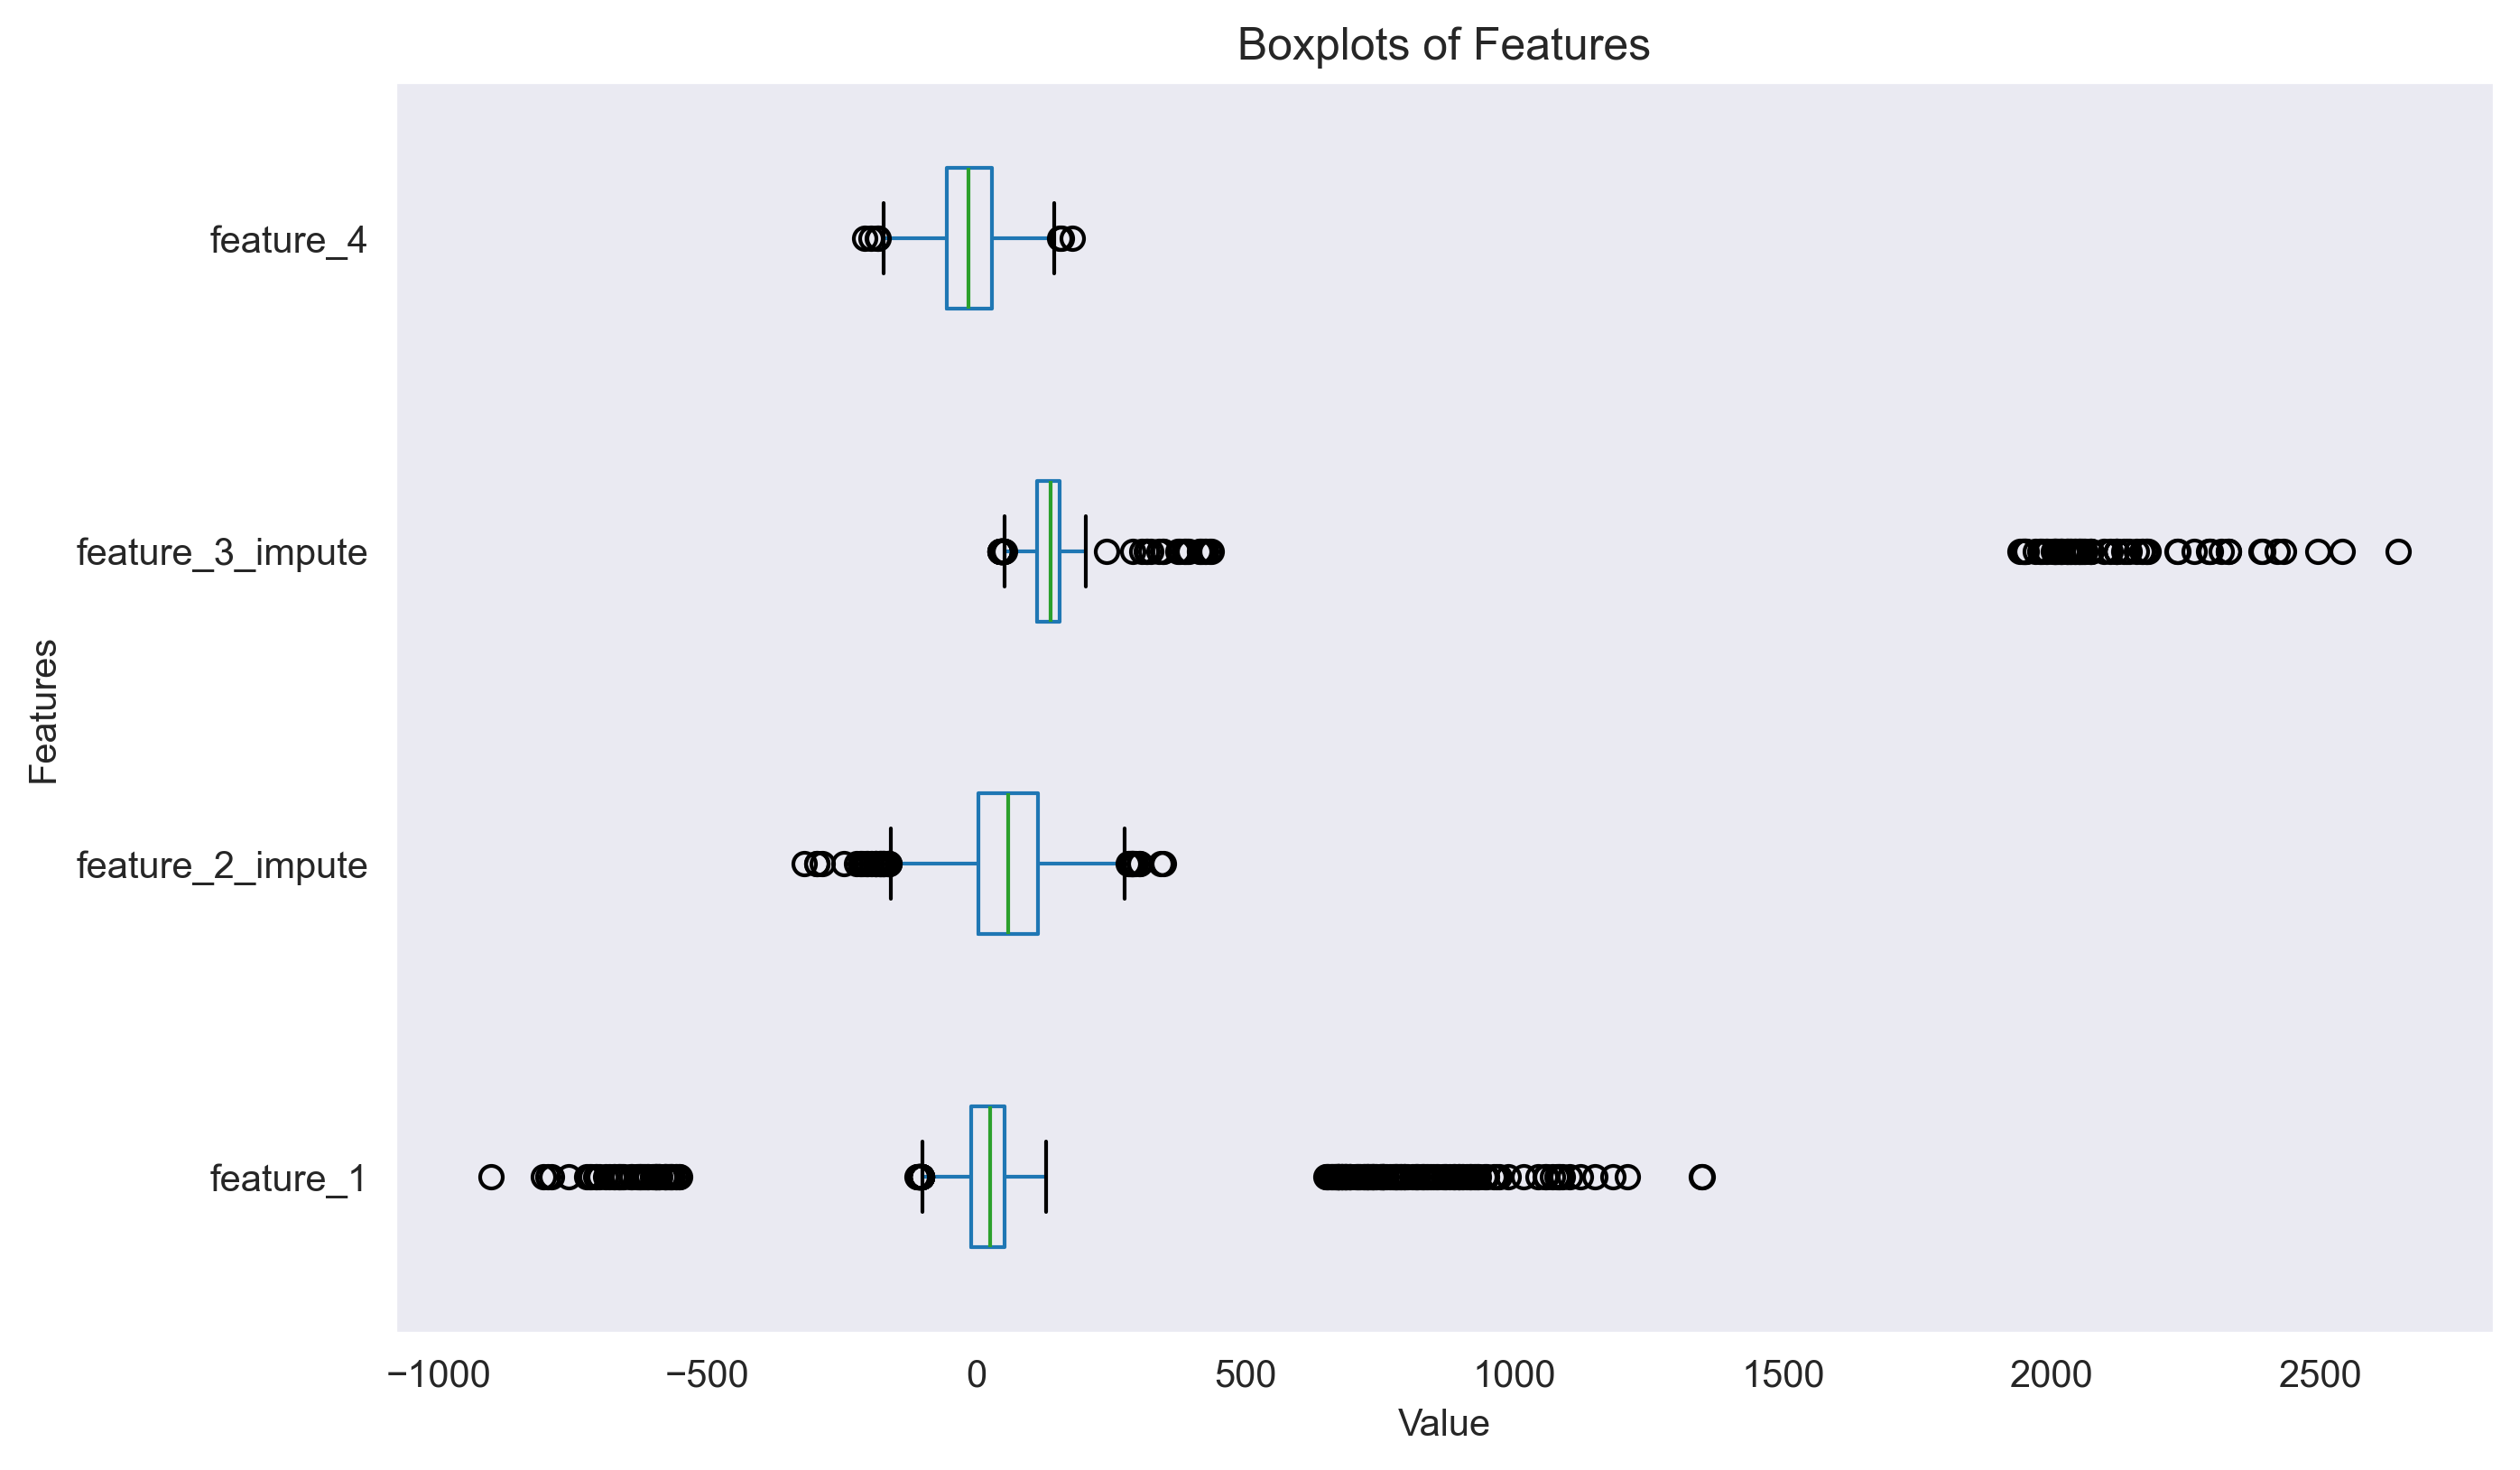

In [258]:

import pandas as pd
import matplotlib.pyplot as plt

features = ["feature_1", "feature_2_impute", "feature_3_impute", "feature_4"]

plt.figure(figsize=(10, 6), dpi=300)  # High-quality figure

# Create boxplot
train[features].boxplot(grid=False, vert=False)
plt.title("Boxplots of Features")
plt.xlabel("Value")
plt.ylabel("Features")
plt.show()

feature 3 has a ton of outliers which aren't meaningful as we've already discovered that features 2 and 4 have our predictive power. So we will remove feature 3's top and bottom percentiles. 

In [259]:
# Remove top 1 percent and save indices and values
top_threshold = train['feature_3_impute'].quantile(0.99)
top_outliers = train.loc[train['feature_3_impute'] > top_threshold, ['feature_3_impute']].copy()
top_outliers['Index'] = top_outliers.index

train.loc[train['feature_3_impute'] > top_threshold, 'feature_3_impute'] = pd.NA

# Remove bottom 1 percent and save indices and values
bottom_threshold = train['feature_3_impute'].quantile(0.01)
bottom_outliers = train.loc[train['feature_3_impute'] < bottom_threshold, ['feature_3_impute']].copy()
bottom_outliers['Index'] = bottom_outliers.index

train.loc[train['feature_3_impute'] < bottom_threshold, 'feature_3_impute'] = pd.NA

# Combine outlier information into a single dictionary or DataFrame
removed_outliers = pd.concat([top_outliers, bottom_outliers]).set_index('Index')


since we inputed the NA's with the median including these outlier previusly to run diagnostics, we store those locations. put those NA's back and impute the median now that those outliers have been removed

In [260]:
train.loc[na_indices_train, 'feature_3_impute'] = np.nan
test.loc[na_indices_test, 'feature_3_impute'] = np.nan

In [261]:
median_value = train['feature_3_impute'].median()
train['feature_3_impute'].fillna(median_value, inplace=True)

median_value = test['feature_3_impute'].median()
test['feature_3_impute'].fillna(median_value, inplace=True)

/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_26293/2685370115.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['feature_3_impute'].fillna(median_value, inplace=True)
/var/folders/2y/cbtx_pl154qczd091zb0d4z40000gn/T/ipykernel_26293/2685370115.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

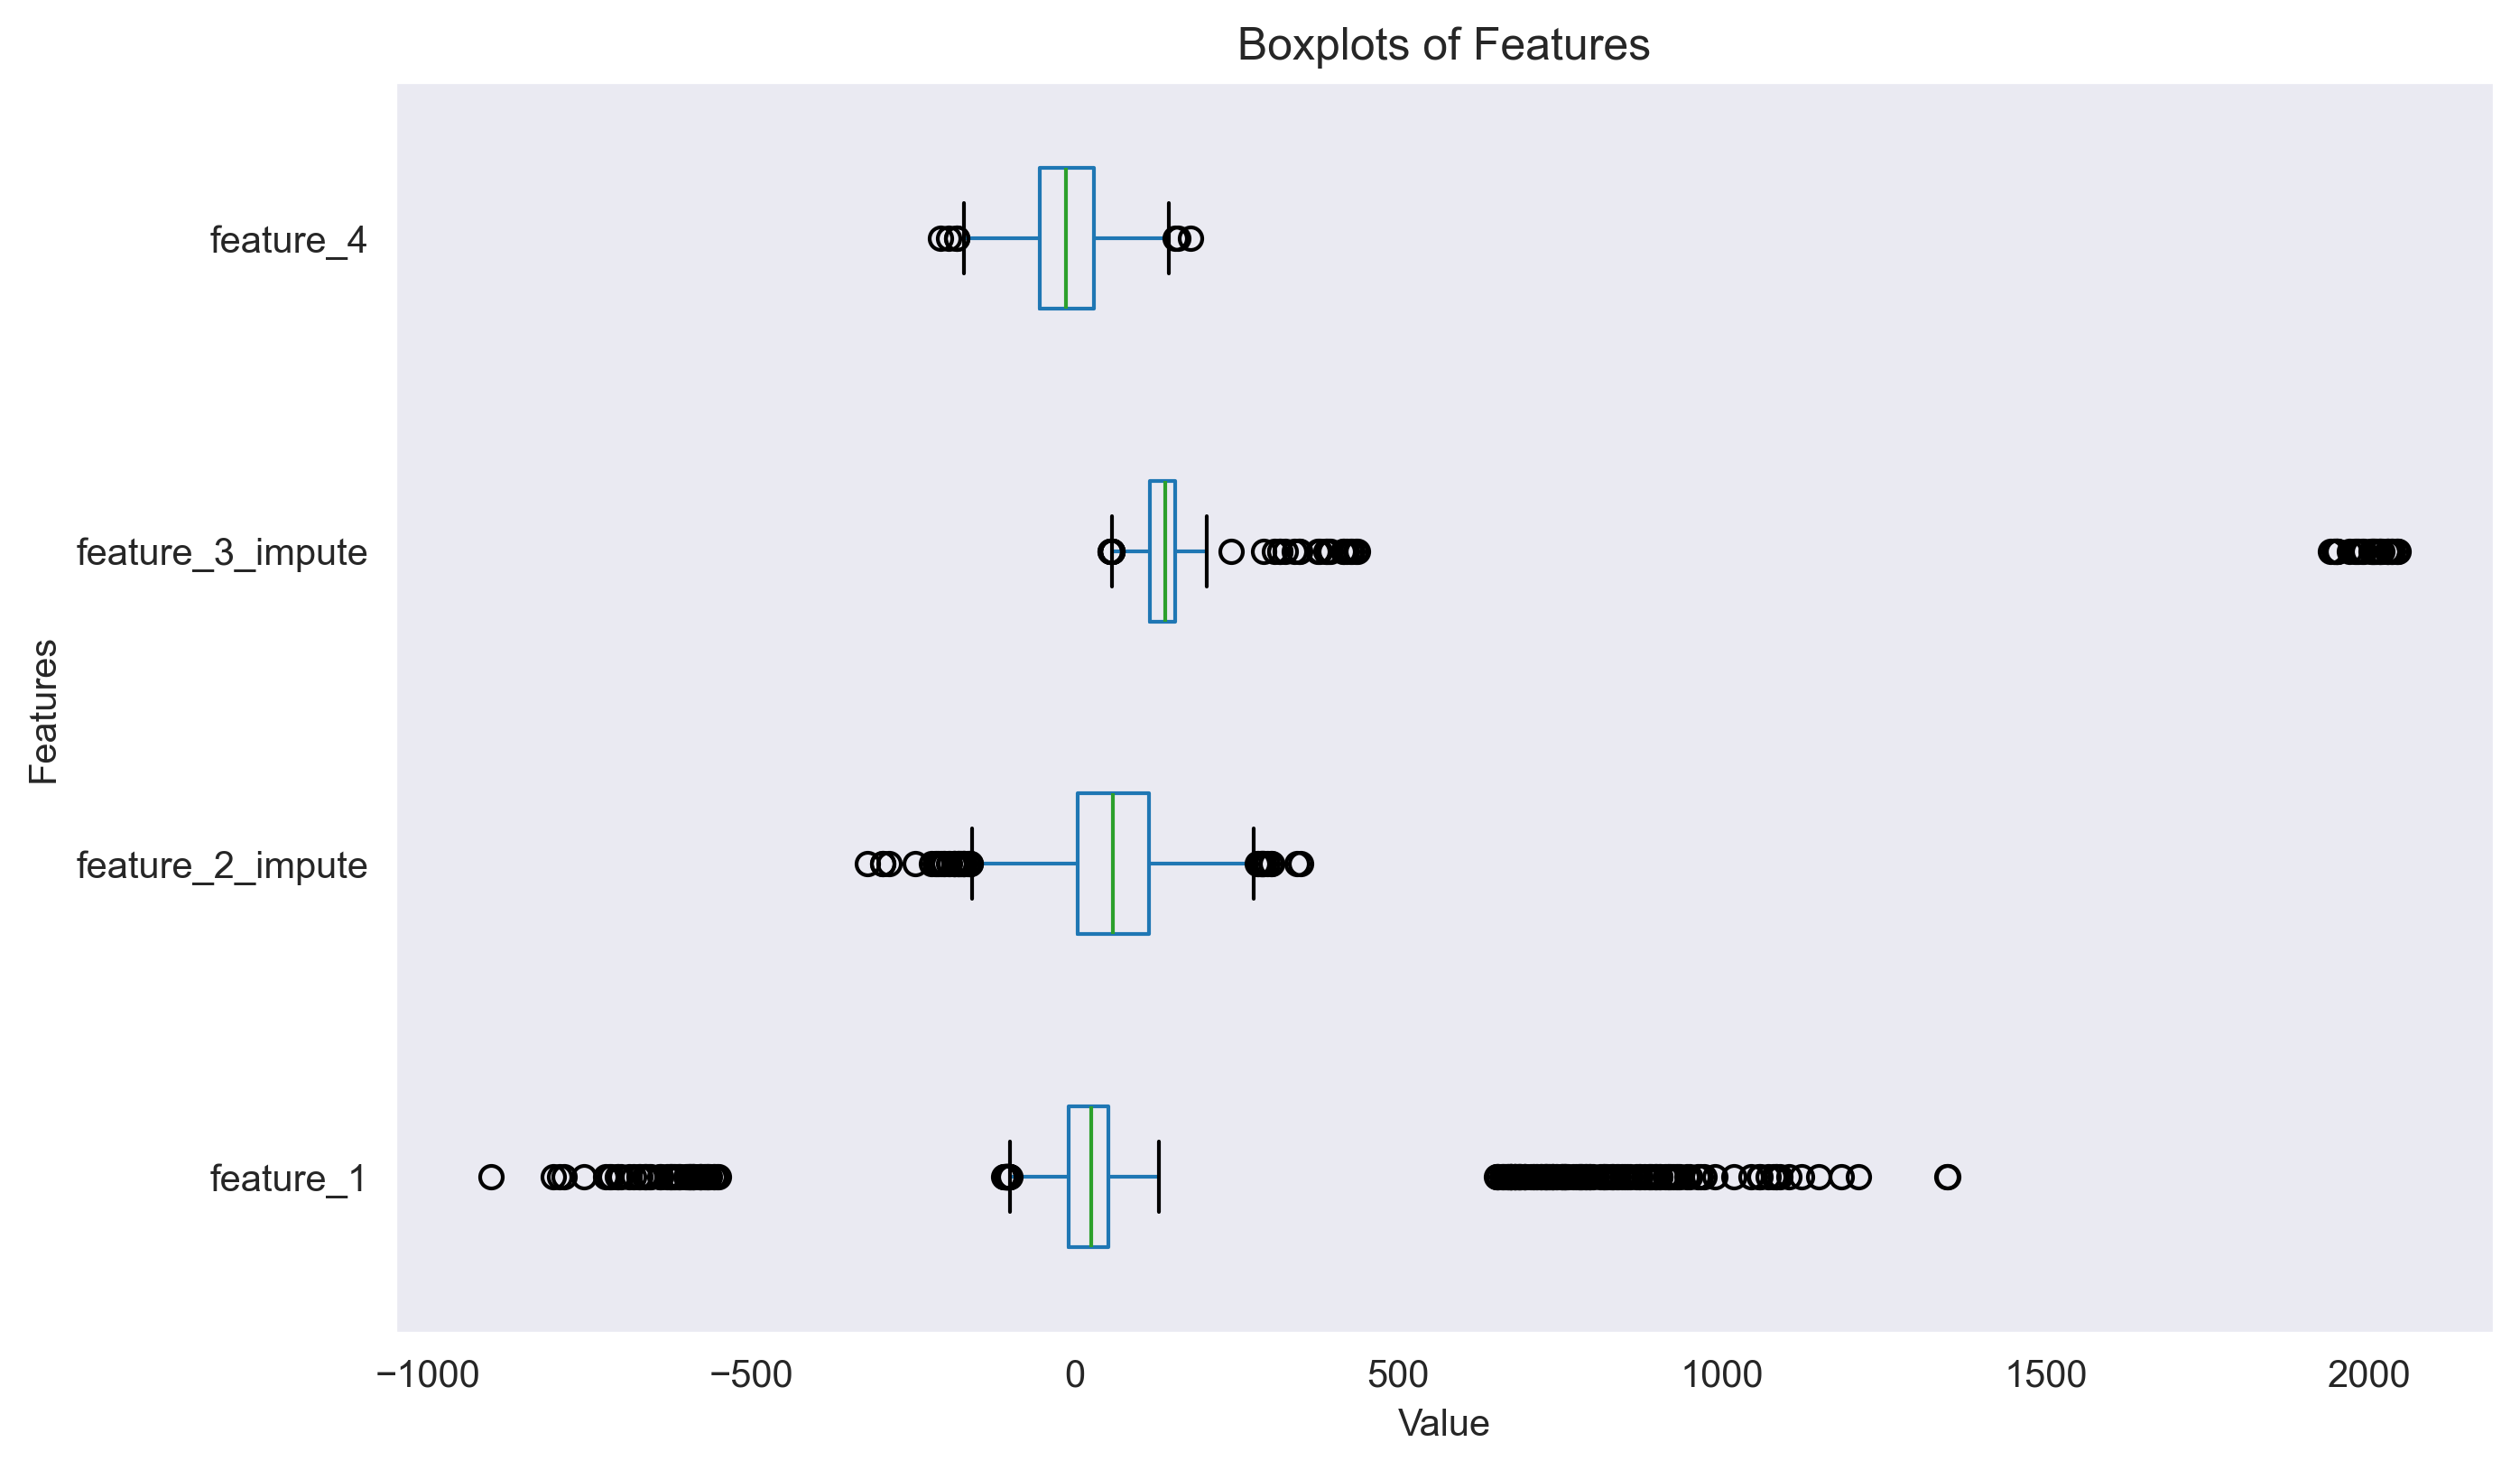

In [262]:
import pandas as pd
import matplotlib.pyplot as plt

features = ["feature_1", "feature_2_impute", "feature_3_impute", "feature_4"]

plt.figure(figsize=(10, 6), dpi=300)  # High-quality figure

# Create boxplot
train[features].boxplot(grid=False, vert=False)
plt.title("Boxplots of Features")
plt.xlabel("Value")
plt.ylabel("Features")
plt.show()

now let's see how this effected our model coeficients' 

In [263]:
import statsmodels.api as sm

predictor = train[['feature_1', 'feature_2_impute', 'feature_3_impute', 'feature_4']]
response = train['y']

predictor_with_const = sm.add_constant(predictor)

logit_model = sm.Logit(response, predictor_with_const)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.392347
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3941
Model:                          Logit   Df Residuals:                     3936
Method:                           MLE   Df Model:                            4
Date:                Thu, 19 Dec 2024   Pseudo R-squ.:                  0.2250
Time:                        07:29:14   Log-Likelihood:                -1546.2
converged:                       True   LL-Null:                       -1995.2
Covariance Type:            nonrobust   LLR p-value:                4.927e-193
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.4599      0.260     13.299      0.000       2.950       3.970
feature_1  

feature 1 is no longer has a p-value larger enough to be printed in the model summary

let's check our predictors scatter plot matrix again since we removed those outliers.

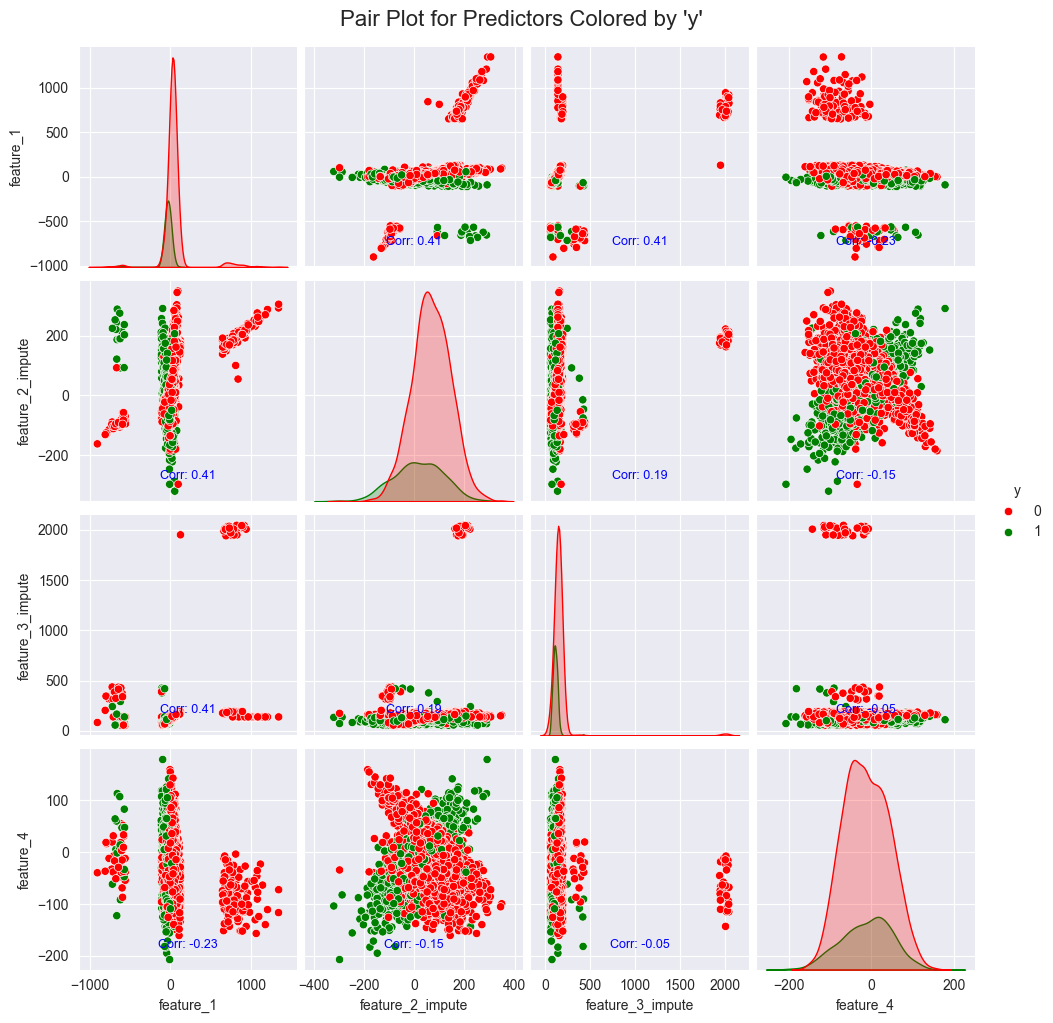

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_full_pairplot_with_corr(df, continuous_vars, target_var='target', positive_value=1, negative_value=0):
    """
    Generate a Seaborn pair plot with correlation coefficients annotated on the scatter plots,
    showing a full matrix.

    Parameters:
    - df: DataFrame containing the data.
    - continuous_vars: List of continuous variable column names.
    - target_var: Name of the binary target column (default='target').
    - positive_value: Value representing positive outcomes (default=1).
    - negative_value: Value representing negative outcomes (default=0).
    """
    # Filter DataFrame for the required columns
    pairplot_data = df[continuous_vars + [target_var]].copy()
    
    # Ensure the target variable is categorical for coloring
    pairplot_data[target_var] = pairplot_data[target_var].astype('category')
    
    # Calculate pairwise correlations
    correlation_matrix = pairplot_data[continuous_vars].corr()
    
    # Create the pair plot
    g = sns.pairplot(
        pairplot_data,
        hue=target_var,
        palette={positive_value: 'green', negative_value: 'red'},
        diag_kind='kde',
        corner=False
    )
    
    # Annotate correlation coefficients
    for i, row_var in enumerate(continuous_vars):
        for j, col_var in enumerate(continuous_vars):
            if i != j:  # Skip diagonal
                # Get the current axis
                ax = g.axes[i, j]
                # Get the correlation value
                corr = correlation_matrix.loc[row_var, col_var]
                # Annotate the correlation on the scatter plot
                ax.annotate(
                    f"Corr: {corr:.2f}",
                    xy=(0.5, 0.1),
                    xycoords="axes fraction",
                    ha="center",
                    fontsize=9,
                    color="blue"
                )
    
    # Add a title for context
    plt.suptitle(f"Pair Plot for Predictors Colored by '{target_var}'", y=1.02, fontsize=16)
    plt.show()

# Continuous variables and target variable
# Call the function for the specific data
continuous_vars_1 = ['age', 'dist', 'income', 'marital_status', 'gender']
target_var = 'target'


# You can call the function again for a different set of variables if needed
continuous_vars_2 = ['feature_1', 'feature_2_impute', 'feature_3_impute', 'feature_4']
response_var_2 = 'y'

plot_full_pairplot_with_corr(train, continuous_vars_2, response_var_2, positive_value=1, negative_value=0)

notice how Row 1 column 3 of the matrix previously had 0.70 coorelation of which almost all were negative outcome points. Those outlier points may have strengened the model, we will test this later once we evaluate model performance metrics. 

Standardize the predictors then produce model for performance testing. 

In [265]:
features = ['feature_1', 'feature_2_impute', 'feature_3_impute', 'feature_4']


for feature in features:
    train[feature] = (train[feature] - train[feature].mean(skipna=True)) / train[feature].std(skipna=True)


train.rename(columns={
    'feature_1': 'feature_1_standard',
    'feature_2_impute': 'feature_2_standard',
    'feature_3_impute': 'feature_3_standard',
    'feature_4': 'feature_4_standard'
}, inplace=True)


for feature in features:
    test[feature] = (test[feature] - test[feature].mean(skipna=True)) / test[feature].std(skipna=True)


test.rename(columns={
    'feature_1': 'feature_1_standard',
    'feature_2_impute': 'feature_2_standard',
    'feature_3_impute': 'feature_3_standard',
    'feature_4': 'feature_4_standard'
}, inplace=True)



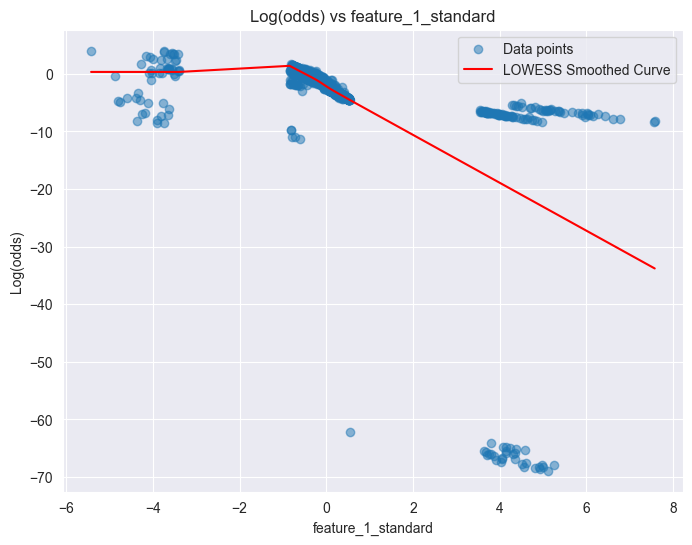

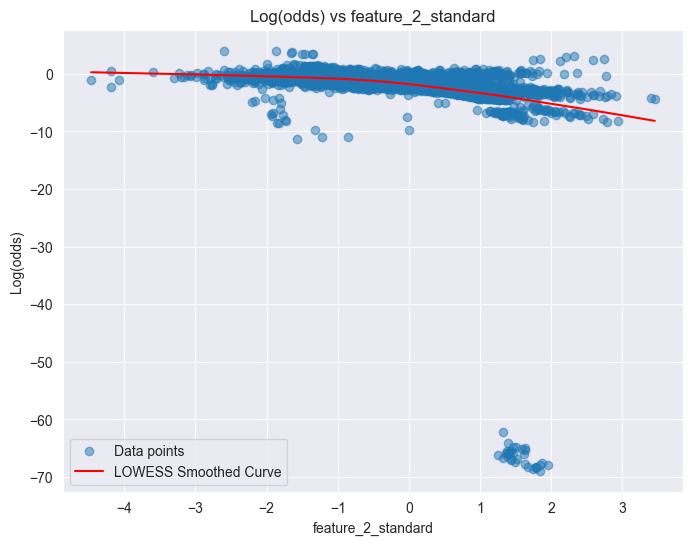

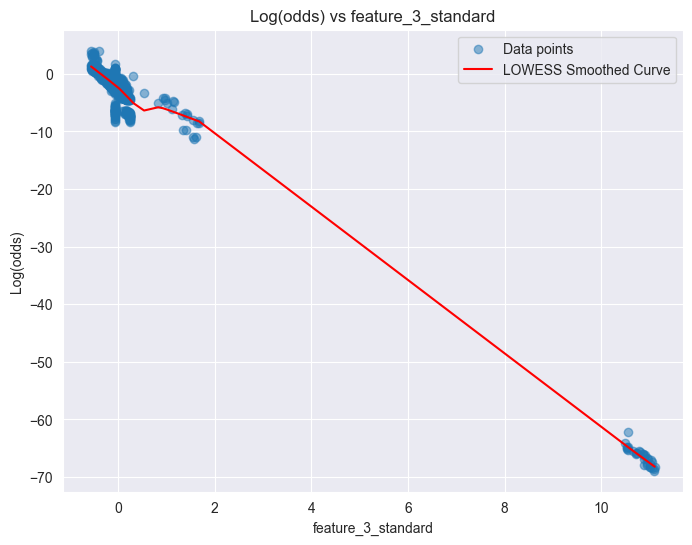

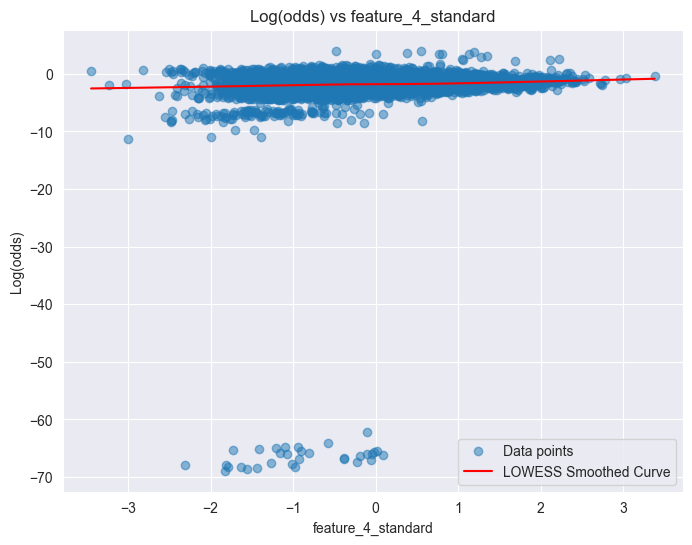

In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


predictor = train[['feature_1_standard', 'feature_2_standard', 'feature_3_standard', 'feature_4_standard']]  
response = train['y']  

test_predictor = test[['feature_1_standard', 'feature_2_standard', 'feature_3_standard', 'feature_4_standard']]  # Predictors

test_response = test['y']



model = LogisticRegression(fit_intercept=True) 
model.fit(predictor, response)




import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Fit logistic regression model
predictor = train[['feature_1_standard', 'feature_2_standard', 'feature_3_standard', 'feature_4_standard']]  
response = train['y']  

model = LogisticRegression(fit_intercept=True) 
model.fit(predictor, response)

# Calculate predicted probabilities for the training data
predicted_probs = model.predict_proba(predictor)[:, 1]  # Probability of the positive class

# Calculate log(odds)
log_odds = np.log(predicted_probs / (1 - predicted_probs))

# Plot the log(odds) curve for each predictor
for col in predictor.columns:
    plt.figure(figsize=(8, 6))
    
    # Scatter plot
    plt.scatter(predictor[col], log_odds, alpha=0.5, label='Data points')
    
    # Add LOWESS smoothed curve
    from statsmodels.nonparametric.smoothers_lowess import lowess
    lowess_smoothed = lowess(log_odds, predictor[col])
    plt.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='red', label='LOWESS Smoothed Curve')
    
    # Labels and title
    plt.title(f'Log(odds) vs {col}')
    plt.xlabel(col)
    plt.ylabel('Log(odds)')
    plt.legend()
    plt.show()



In [267]:
# Find number of observations that exceed Cook's distance threshold
outliers = diagnosis_df[diagnosis_df['cooks_d'] > cook_threshold]
prop_outliers = round(100*(len(outliers) / len(train)),1)
print(f'Proportion of data points that are highly influential = {prop_outliers}%')

Proportion of data points that are highly influential = 4.0%


In [268]:
# Find number of observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]
prop_extreme = round(100*(len(extreme) / len(train)),1)

In [269]:
# Display top 5 most influential outliers
extreme.sort_values("cooks_d", ascending=False).head()

,cooks_d,std_resid
639,0.072239,4.003236
289,0.057710,3.065210
1001,0.056714,3.437973


concidering there are only 3 points that are beyond cooks threshold and are 3 standard deviations outside of the mean residual at zero. 

This model looks good.

Threshold for Cook Distance = 0.0010149708195889369


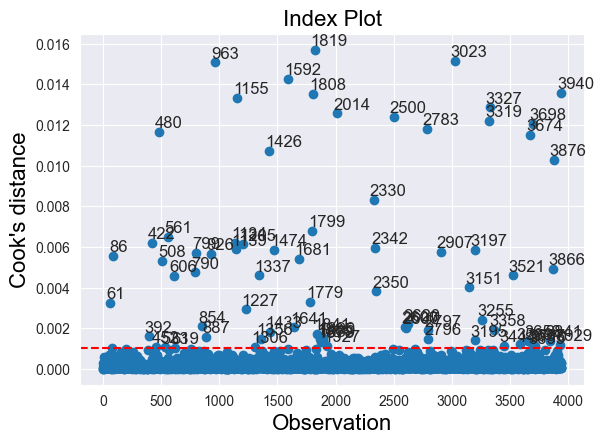

In [270]:
from scipy import stats
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import math
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score




predictor = train[['feature_1_standard', 'feature_2_standard', 'feature_3_standard', 'feature_4_standard']]  
response = train['y']  


logit_model = GLM(response, predictor, family=families.Binomial())


model = logit_model.fit()



# Get influence measures
influence = model.get_influence()

# Obtain summary df of influence measures
summ_df = influence.summary_frame()

# Filter summary df to Cook distance
diagnosis_df = summ_df.loc[:,['cooks_d']]

# Append absolute standardized residual values
diagnosis_df['std_resid'] = stats.zscore(model.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df.loc[:,'std_resid'].apply(lambda x: np.abs(x))

# Sort by Cook's Distance
diagnosis_df.sort_values("cooks_d", ascending=False)
diagnosis_df.head()



# Set Cook's distance threshold
cook_threshold = 4 / len(train)
print(f"Threshold for Cook Distance = {cook_threshold}")

# Plot influence measures (Cook's distance)
fig = influence.plot_index(y_var="cooks", threshold=cook_threshold)
plt.axhline(y = cook_threshold, ls="--", color='red')
fig.tight_layout(pad=2)

and let's verify with our testind data that it has similar outliers such that they are necessary to prevent over-fitting

Threshold for Cook Distance = 0.0010149708195889369


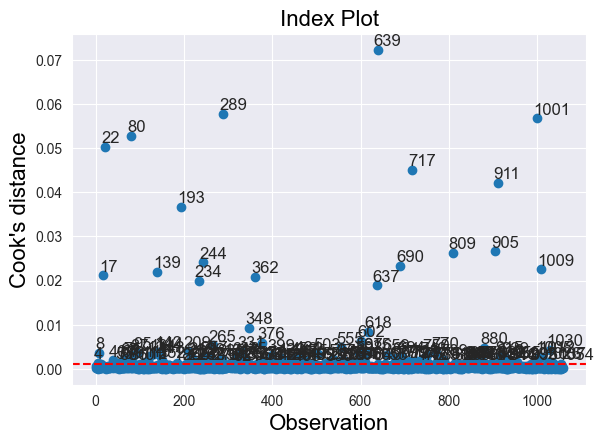

In [271]:
from scipy import stats
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import math
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score




predictor = test[['feature_1_standard', 'feature_2_standard', 'feature_3_standard', 'feature_4_standard']]  
response = test['y']  


logit_model = GLM(response, predictor, family=families.Binomial())


model = logit_model.fit()



# Get influence measures
influence = model.get_influence()

# Obtain summary df of influence measures
summ_df = influence.summary_frame()

# Filter summary df to Cook distance
diagnosis_df = summ_df.loc[:,['cooks_d']]

# Append absolute standardized residual values
diagnosis_df['std_resid'] = stats.zscore(model.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df.loc[:,'std_resid'].apply(lambda x: np.abs(x))

# Sort by Cook's Distance
diagnosis_df.sort_values("cooks_d", ascending=False)
diagnosis_df.head()



# Set Cook's distance threshold
cook_threshold = 4 / len(train)
print(f"Threshold for Cook Distance = {cook_threshold}")

# Plot influence measures (Cook's distance)
fig = influence.plot_index(y_var="cooks", threshold=cook_threshold)
plt.axhline(y = cook_threshold, ls="--", color='red')
fig.tight_layout(pad=2)

the inclusion of such outliers are necesary 

Threshold for Cook Distance = 0.0010149708195889369


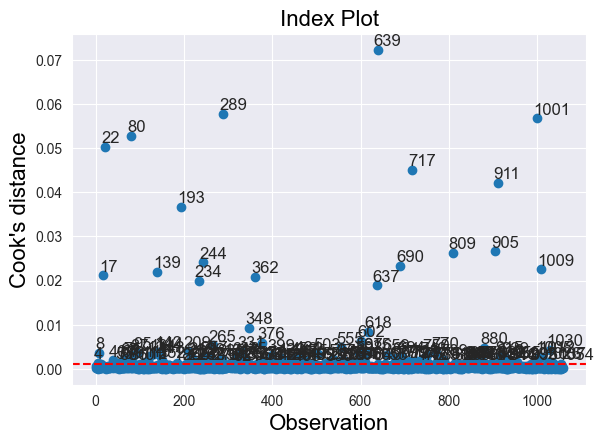

In [272]:
# Set Cook's distance threshold
cook_threshold = 4 / len(train)
print(f"Threshold for Cook Distance = {cook_threshold}")

# Plot influence measures (Cook's distance)
fig = influence.plot_index(y_var="cooks", threshold=cook_threshold)
plt.axhline(y = cook_threshold, ls="--", color='red')
fig.tight_layout(pad=2)

ROC Curve

In [273]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
predicted_probabilities = model.predict_proba(test_predictor)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_response, predicted_probabilities)
auc = roc_auc_score(test_response, predicted_probabilities)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

AttributeError: 'GLMResults' object has no attribute 'predict_proba'

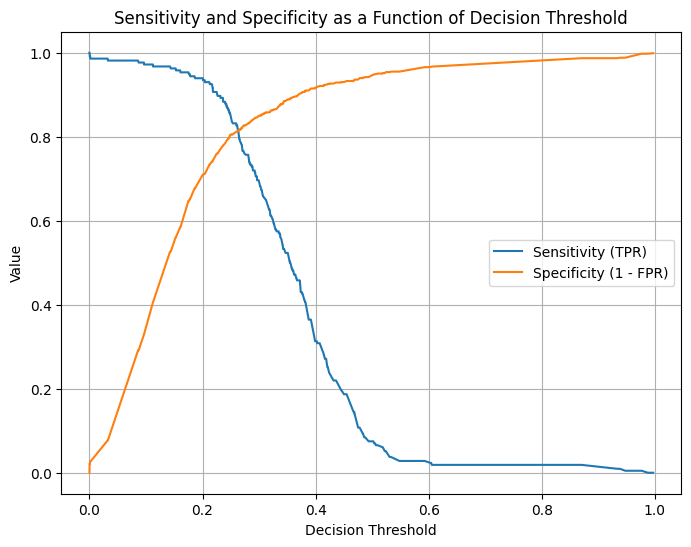

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Predict probabilities for the positive class
predicted_probabilities = model.predict_proba(test_predictor)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(test_response, predicted_probabilities)

# Compute specificity
specificity = 1 - fpr

# Plot sensitivity and specificity as a function of decision threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tpr, label='Sensitivity (TPR)')
plt.plot(thresholds, specificity, label='Specificity (1 - FPR)')
plt.xlabel('Decision Threshold')
plt.ylabel('Value')
plt.title('Sensitivity and Specificity as a Function of Decision Threshold')
plt.legend(loc='best')
plt.grid()
plt.show()

In [79]:
# Compute the absolute difference between sensitivity and specificity
difference = np.abs(tpr - specificity)

# Find the index of the minimum difference
min_diff_index = np.argmin(difference)

# Get the threshold corresponding to the minimum difference
optimal_threshold = thresholds[min_diff_index]

# Print the optimal threshold
print(f"The decision threshold at which the difference between sensitivity and specificity is least: {optimal_threshold:.4f}")

The decision threshold at which the difference between sensitivity and specificity is least: 0.2628


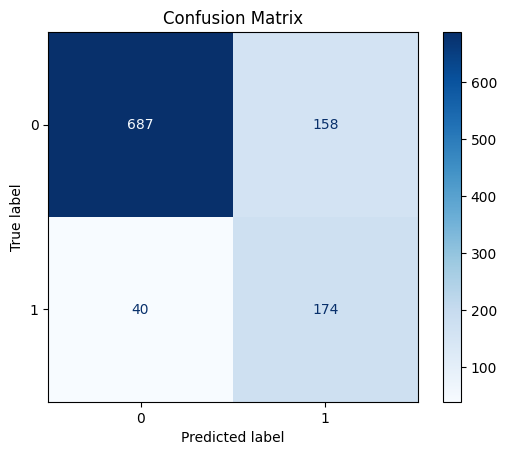

In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions based on a threshold (default 0.5)
predicted_classes = (predicted_probabilities >= 0.2628).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(test_response, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

,feature_1_standard,feature_2_standard,feature_3_standard,feature_4_standard,id,date,y,binned
0,0.010373,0.038666,-0.070500,-0.411069,50501,2000,0,"(-52.76, -14.151]"
1,-0.288562,0.011480,-0.139486,1.002214,50501,2001,1,"(24.459, 63.068]"
2,-0.215484,-1.140790,-0.066392,1.365312,50501,2002,0,"(63.068, 101.678]"
3,-0.202476,-0.082861,-0.153723,0.152855,50501,2003,0,"(-14.151, 24.459]"
4,-0.174233,-1.664944,0.000491,1.903419,50501,2004,0,"(63.068, 101.678]"


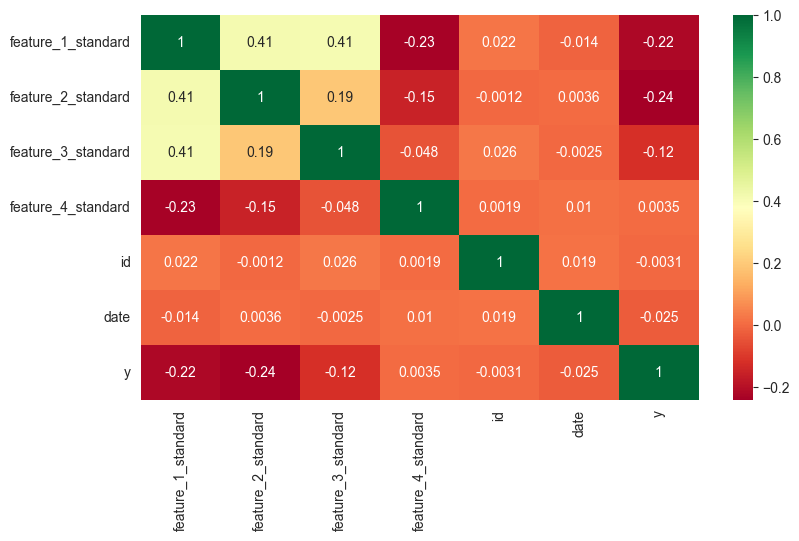

In [276]:
display(train.head())
corrMatrix = train.drop(columns='binned').corr()
plt.subplots(figsize=(9, 5))
sns.heatmap(corrMatrix, annot=True, cmap="RdYlGn")
plt.show()

In [279]:
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(train.drop(columns='binned'))

,variables,VIF
0,feature_1_standard,1.480195
1,feature_2_standard,1.251905
2,feature_3_standard,1.208358
3,feature_4_standard,1.069791
4,id,125851.509491
5,date,125843.426516
6,y,1.367635


In [282]:
display(train.head())

,feature_1_standard,feature_2_standard,feature_3_standard,feature_4_standard,id,date,y,binned
0,0.010373,0.038666,-0.070500,-0.411069,50501,2000,0,"(-52.76, -14.151]"
1,-0.288562,0.011480,-0.139486,1.002214,50501,2001,1,"(24.459, 63.068]"
2,-0.215484,-1.140790,-0.066392,1.365312,50501,2002,0,"(63.068, 101.678]"
3,-0.202476,-0.082861,-0.153723,0.152855,50501,2003,0,"(-14.151, 24.459]"
4,-0.174233,-1.664944,0.000491,1.903419,50501,2004,0,"(63.068, 101.678]"


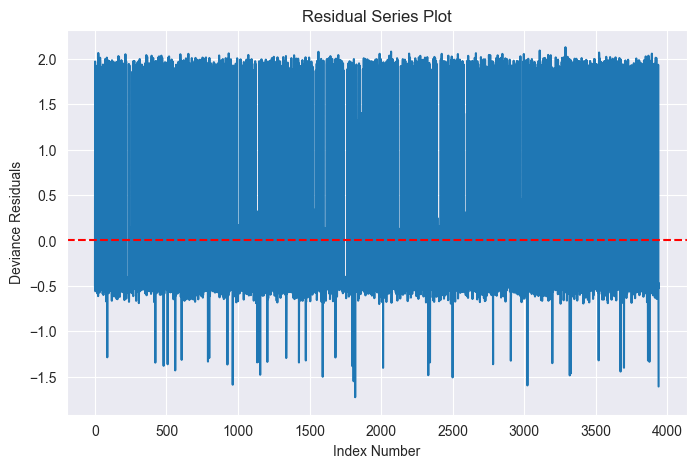

In [286]:
logit_results = GLM(train['y'], train['feature_1_standard'], family=families.Binomial()).fit()

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, title="Residual Series Plot",
                     xlabel="Index Number", 
                     ylabel="Deviance Residuals")

# Generate residual series plot using standardized deviance residuals
ax.plot(train.index.tolist(), 
        stats.zscore(logit_results.resid_deviance))

# Draw horizontal line at y=0
plt.axhline(y = 0, ls="--", color='red')

# Inference: 
# Since the residuals in the plot above appear to be randomly scattered around the centerline 
# of zero, we can infer (visually) that the assumption is satisfied.
# From the above Deviance residuals versus index number plot, 
# we can see that the assumption of independence of errors is satisfied

we already knew the observations weren't independent